In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [2]:
def build_generator(latent_dim):
    model = keras.Sequential()
    model.add(layers.Dense(256, input_dim=latent_dim))
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.Dense(512))
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.Dense(1024))
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.Dense(784, activation='tanh'))
    model.add(layers.Reshape((28, 28, 1)))
    return model


In [3]:
def build_discriminator():
    model = keras.Sequential()
    model.add(layers.Flatten(input_shape=(28, 28, 1)))
    model.add(layers.Dense(512))
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.Dense(256))
    model.add(layers.LeakyReLU(alpha=0.2))
    model.add(layers.Dense(1, activation='sigmoid'))
    return model


In [4]:
def build_gan(generator, discriminator):
    discriminator.trainable = False
    model = keras.Sequential()
    model.add(generator)
    model.add(discriminator)
    return model


In [5]:
(X_train, _), (_, _) = keras.datasets.mnist.load_data()
X_train = X_train.reshape((-1, 28, 28, 1)).astype("float32") / 255.


11490434/11490434 [==============================] - 1s 0us/step


In [7]:
latent_dim = 100
epochs = 50
batch_size = 128

generator = build_generator(latent_dim)
discriminator = build_discriminator()
discriminator.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0002), loss='binary_crossentropy')
gan = build_gan(generator, discriminator)

gan.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0002), loss='binary_crossentropy')

for epoch in range(epochs):
    for step in range(X_train.shape[0] // batch_size):
        # Generate random noise as input for the generator
        noise = np.random.normal(0, 1, size=(batch_size, latent_dim))
        
        # Generate fake images using the generator
        fake_images = generator.predict(noise)
        
        # Select a random batch of real images
        real_images = X_train[np.random.randint(0, X_train.shape[0], size=batch_size)]
        
        # Create training batches for the discriminator
        x = np.concatenate((real_images, fake_images))
        y = np.array([1] * batch_size + [0] * batch_size)
        
        # Train the discriminator
        discriminator_loss = discriminator.train_on_batch(x, y)
        
        # Generate new random noise
        noise = np.random.normal(0, 1, size=(batch_size, latent_dim))
        
        # Defining the desired output for the generator (tricking the discriminator)
        y_gen = np.array([1] * batch_size)
        
        # Train the generator
        gan_loss = gan.train_on_batch(noise, y_gen)
    
    print(f"Epoch: {epoch} | Discriminator loss: {discriminator_loss:.4f} | GAN loss: {gan_loss:.4f}")

4/4 [==============================] - 0s 6ms/step

4/4 [==============================] - 0s 0s/step


4/4 [==============================] - 0s 2ms/step


4/4 [==============================] - 0s 0s/step
Epoch: 0 | Discriminator loss: 0.0073 | GAN loss: 6.3551
4/4 [==============================] - 0s 2ms/step


4/4 [==============================] - 0s 5ms/step


4/4 [==============================] - 0s 0s/step


4/4 [==============================] - 0s 2ms/step
Epoch: 1 | Discriminator loss: 0.0026 | GAN loss: 7.2399
4/4 [==============================] - 0s 2ms/step


4/4 [==============================] - 0s 2ms/step


4/4 [==============================] - 0s 2ms/step


4/4 [==============================] - 0s 2ms/step
Epoch: 2 | Discriminator loss: 0.0006 | GAN loss: 9.0075
4/4 [==============================] - 0s 2ms/step


4/4 [==============================] - 0s 2ms/step


4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 2ms/step
Epoch: 3 | Discriminator loss: 0.0006 | GAN loss: 8.8324
4/4 [==============================] - 0s 2ms/step


4/4 [==============================] - 0s 2ms/step


4/4 [==============================] - 0s 0s/step


4/4 [==============================] - 0s 2ms/step
Epoch: 4 | Discriminator loss: 0.0009 | GAN loss: 7.6569
4/4 [==============================] - 0s 154us/step


4/4 [==============================] - 0s 2ms/step


4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 1ms/step
Epoch: 5 | Discriminator loss: 0.0002 | GAN loss: 10.8426
4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 2ms/step


4/4 [==============================] - 0s 2ms/step
Epoch: 6 | Discriminator loss: 0.0001 | GAN loss: 11.8541
4/4 [==============================] - 0s 2ms/step


4/4 [==============================] - 0s 2ms/step


4/4 [==============================] - 0s 2ms/step


4/4 [==============================] - 0s 1ms/step
Epoch: 7 | Discriminator loss: 0.0001 | GAN loss: 12.4565
4/4 [==============================] - 0s 2ms/step


4/4 [==============================] - 0s 2ms/step


4/4 [==============================] - 0s 2ms/step


4/4 [==============================] - 0s 3ms/step
Epoch: 8 | Discriminator loss: 0.0000 | GAN loss: 10.9873
4/4 [==============================] - 0s 2ms/step


4/4 [==============================] - 0s 2ms/step


4/4 [==============================] - 0s 2ms/step


4/4 [==============================] - 0s 2ms/step
Epoch: 9 | Discriminator loss: 0.0000 | GAN loss: 12.7804
4/4 [==============================] - 0s 2ms/step


4/4 [==============================] - 0s 2ms/step


4/4 [==============================] - 0s 3ms/step


4/4 [==============================] - 0s 3ms/step
Epoch: 10 | Discriminator loss: 0.0000 | GAN loss: 13.2896
4/4 [==============================] - 0s 3ms/step


4/4 [==============================] - 0s 2ms/step


4/4 [==============================] - 0s 3ms/step


4/4 [==============================] - 0s 3ms/step
Epoch: 11 | Discriminator loss: 0.0000 | GAN loss: 13.8014
4/4 [==============================] - 0s 2ms/step


4/4 [==============================] - 0s 2ms/step


4/4 [==============================] - 0s 2ms/step


4/4 [==============================] - 0s 2ms/step
Epoch: 12 | Discriminator loss: 0.0000 | GAN loss: 14.1210
4/4 [==============================] - 0s 4ms/step


4/4 [==============================] - 0s 2ms/step


4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 2ms/step
Epoch: 13 | Discriminator loss: 0.0000 | GAN loss: 14.4268
4/4 [==============================] - 0s 2ms/step


4/4 [==============================] - 0s 2ms/step


4/4 [==============================] - 0s 2ms/step
Epoch: 14 | Discriminator loss: 0.0002 | GAN loss: 10.3143
4/4 [==============================] - 0s 2ms/step


4/4 [==============================] - 0s 2ms/step


4/4 [==============================] - 0s 0s/step


4/4 [==============================] - 0s 5ms/step
Epoch: 15 | Discriminator loss: 0.0000 | GAN loss: 12.9357
4/4 [==============================] - 0s 0s/step


4/4 [==============================] - 0s 2ms/step


4/4 [==============================] - 0s 2ms/step


4/4 [==============================] - 0s 1ms/step
Epoch: 16 | Discriminator loss: 0.0000 | GAN loss: 12.8487
4/4 [==============================] - 0s 5ms/step


4/4 [==============================] - 0s 2ms/step


4/4 [==============================] - 0s 495us/step


4/4 [==============================] - 0s 5ms/step
Epoch: 17 | Discriminator loss: 0.0000 | GAN loss: 13.9539
4/4 [==============================] - 0s 3ms/step


4/4 [==============================] - 0s 0s/step


4/4 [==============================] - 0s 5ms/step


4/4 [==============================] - 0s 5ms/step
Epoch: 18 | Discriminator loss: 0.0000 | GAN loss: 15.0310
4/4 [==============================] - 0s 0s/step


4/4 [==============================] - 0s 2ms/step


4/4 [==============================] - 0s 5ms/step


4/4 [==============================] - 0s 0s/step
Epoch: 19 | Discriminator loss: 0.0000 | GAN loss: 15.4709
4/4 [==============================] - 0s 0s/step


4/4 [==============================] - 0s 0s/step


4/4 [==============================] - 0s 5ms/step


4/4 [==============================] - 0s 0s/step
Epoch: 20 | Discriminator loss: 0.0000 | GAN loss: 15.9993
4/4 [==============================] - 0s 0s/step


4/4 [==============================] - 0s 3ms/step


4/4 [==============================] - 0s 0s/step


4/4 [==============================] - 0s 2ms/step
Epoch: 21 | Discriminator loss: 0.0000 | GAN loss: 16.4543
4/4 [==============================] - 0s 2ms/step


4/4 [==============================] - 0s 2ms/step


4/4 [==============================] - 0s 2ms/step


4/4 [==============================] - 0s 2ms/step
Epoch: 22 | Discriminator loss: 0.0000 | GAN loss: 16.7224
4/4 [==============================] - 0s 2ms/step


4/4 [==============================] - 0s 2ms/step


4/4 [==============================] - 0s 2ms/step


4/4 [==============================] - 0s 1ms/step
Epoch: 23 | Discriminator loss: 0.0000 | GAN loss: 16.9700
4/4 [==============================] - 0s 2ms/step


4/4 [==============================] - 0s 2ms/step


4/4 [==============================] - 0s 2ms/step


4/4 [==============================] - 0s 1ms/step
Epoch: 24 | Discriminator loss: 0.0000 | GAN loss: 17.2759
4/4 [==============================] - 0s 2ms/step


4/4 [==============================] - 0s 2ms/step


4/4 [==============================] - 0s 2ms/step


4/4 [==============================] - 0s 2ms/step
Epoch: 25 | Discriminator loss: 0.0000 | GAN loss: 13.5253
4/4 [==============================] - 0s 2ms/step


4/4 [==============================] - 0s 2ms/step


4/4 [==============================] - 0s 2ms/step
Epoch: 26 | Discriminator loss: 0.0000 | GAN loss: 15.4774
4/4 [==============================] - 0s 2ms/step


4/4 [==============================] - 0s 2ms/step


4/4 [==============================] - 0s 2ms/step


4/4 [==============================] - 0s 1ms/step
Epoch: 27 | Discriminator loss: 0.0000 | GAN loss: 17.1229
4/4 [==============================] - 0s 2ms/step


4/4 [==============================] - 0s 2ms/step


4/4 [==============================] - 0s 2ms/step


4/4 [==============================] - 0s 2ms/step
Epoch: 28 | Discriminator loss: 0.0000 | GAN loss: 17.6952
4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 667us/step


4/4 [==============================] - 0s 2ms/step


4/4 [==============================] - 0s 1ms/step
Epoch: 29 | Discriminator loss: 0.0000 | GAN loss: 18.2484
4/4 [==============================] - 0s 2ms/step


4/4 [==============================] - 0s 2ms/step


4/4 [==============================] - 0s 2ms/step


4/4 [==============================] - 0s 2ms/step
Epoch: 30 | Discriminator loss: 0.0000 | GAN loss: 18.6315
4/4 [==============================] - 0s 2ms/step


4/4 [==============================] - 0s 2ms/step


4/4 [==============================] - 0s 2ms/step


4/4 [==============================] - 0s 2ms/step
Epoch: 31 | Discriminator loss: 0.0000 | GAN loss: 19.0949
4/4 [==============================] - 0s 2ms/step


4/4 [==============================] - 0s 2ms/step


4/4 [==============================] - 0s 2ms/step


4/4 [==============================] - 0s 2ms/step
Epoch: 32 | Discriminator loss: 0.0000 | GAN loss: 19.3762
4/4 [==============================] - 0s 1ms/step


4/4 [==============================] - 0s 2ms/step


4/4 [==============================] - 0s 2ms/step


4/4 [==============================] - 0s 2ms/step
Epoch: 33 | Discriminator loss: 0.0000 | GAN loss: 19.6427
4/4 [==============================] - 0s 2ms/step


4/4 [==============================] - 0s 2ms/step


4/4 [==============================] - 0s 2ms/step


4/4 [==============================] - 0s 2ms/step
Epoch: 34 | Discriminator loss: 0.0000 | GAN loss: 19.9406
4/4 [==============================] - 0s 2ms/step


4/4 [==============================] - 0s 2ms/step


4/4 [==============================] - 0s 2ms/step


4/4 [==============================] - 0s 2ms/step
Epoch: 35 | Discriminator loss: 0.0000 | GAN loss: 16.2187
4/4 [==============================] - 0s 2ms/step


4/4 [==============================] - 0s 2ms/step


4/4 [==============================] - 0s 2ms/step


4/4 [==============================] - 0s 2ms/step
Epoch: 36 | Discriminator loss: 0.0000 | GAN loss: 17.6274
4/4 [==============================] - 0s 2ms/step


4/4 [==============================] - 0s 2ms/step


4/4 [==============================] - 0s 2ms/step


4/4 [==============================] - 0s 2ms/step
Epoch: 37 | Discriminator loss: 0.0000 | GAN loss: 19.4443
4/4 [==============================] - 0s 2ms/step


4/4 [==============================] - 0s 2ms/step


4/4 [==============================] - 0s 0s/step


4/4 [==============================] - 0s 0s/step
Epoch: 38 | Discriminator loss: 0.0000 | GAN loss: 19.8998
4/4 [==============================] - 0s 0s/step


4/4 [==============================] - 0s 0s/step


4/4 [==============================] - 0s 5ms/step


4/4 [==============================] - 0s 0s/step
Epoch: 39 | Discriminator loss: 0.0000 | GAN loss: 20.5500
4/4 [==============================] - 0s 0s/step


4/4 [==============================] - 0s 0s/step


4/4 [==============================] - 0s 0s/step
Epoch: 40 | Discriminator loss: 0.0000 | GAN loss: 20.9560
4/4 [==============================] - 0s 0s/step


4/4 [==============================] - 0s 0s/step


4/4 [==============================] - 0s 3ms/step


4/4 [==============================] - 0s 0s/step
Epoch: 41 | Discriminator loss: 0.0000 | GAN loss: 19.6915
4/4 [==============================] - 0s 0s/step


4/4 [==============================] - 0s 0s/step


4/4 [==============================] - 0s 0s/step


4/4 [==============================] - 0s 5ms/step
Epoch: 42 | Discriminator loss: 0.0000 | GAN loss: 20.5125
4/4 [==============================] - 0s 5ms/step


4/4 [==============================] - 0s 0s/step


4/4 [==============================] - 0s 5ms/step


4/4 [==============================] - 0s 5ms/step
Epoch: 43 | Discriminator loss: 0.0000 | GAN loss: 21.1667
4/4 [==============================] - 0s 0s/step


4/4 [==============================] - 0s 5ms/step


4/4 [==============================] - 0s 5ms/step


4/4 [==============================] - 0s 5ms/step
Epoch: 44 | Discriminator loss: 0.0000 | GAN loss: 21.5338
4/4 [==============================] - 0s 0s/step


4/4 [==============================] - 0s 0s/step


4/4 [==============================] - 0s 0s/step


4/4 [==============================] - 0s 5ms/step
Epoch: 45 | Discriminator loss: 0.0000 | GAN loss: 21.9602
4/4 [==============================] - 0s 0s/step


4/4 [==============================] - 0s 0s/step


4/4 [==============================] - 0s 5ms/step


4/4 [==============================] - 0s 0s/step
Epoch: 46 | Discriminator loss: 0.0000 | GAN loss: 22.1400
4/4 [==============================] - 0s 0s/step


4/4 [==============================] - 0s 0s/step


4/4 [==============================] - 0s 0s/step


4/4 [==============================] - 0s 0s/step
Epoch: 47 | Discriminator loss: 0.0000 | GAN loss: 22.3250
4/4 [==============================] - 0s 0s/step


4/4 [==============================] - 0s 4ms/step


4/4 [==============================] - 0s 0s/step


4/4 [==============================] - 0s 0s/step
Epoch: 48 | Discriminator loss: 0.0000 | GAN loss: 22.5933
4/4 [==============================] - 0s 0s/step


4/4 [==============================] - 0s 5ms/step


4/4 [==============================] - 0s 0s/step
Epoch: 49 | Discriminator loss: 0.0000 | GAN loss: 22.7114


1/1 [==============================] - 0s 47ms/step


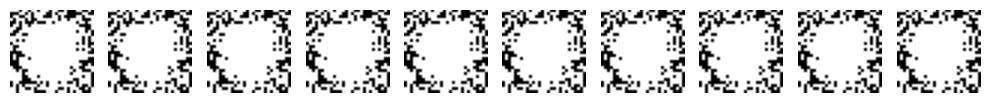

In [8]:
n_images = 10
noise = np.random.normal(0, 1, size=(n_images, latent_dim))
generated_images = generator.predict(noise)

# Plotting the generated images
fig, axs = plt.subplots(1, n_images, figsize=(10, 2))
for i in range(n_images):
    axs[i].imshow(generated_images[i, :, :, 0], cmap='gray')
    axs[i].axis('off')
plt.tight_layout()
plt.show()